In [1]:
# 📚 Import all the tools we need

import pandas as pd        # for data
import numpy as np         # for numbers
import matplotlib.pyplot as plt  # for charts
import seaborn as sns      # for prettier charts
from sklearn.model_selection import train_test_split  # for splitting data
from sklearn.linear_model import LinearRegression     # for building model
from sklearn.metrics import mean_absolute_error, r2_score  # for checking model

In [3]:
# Load the house price dataset
df = pd.read_csv("Bengaluru_House_Data.csv")

# Show first 5 rows to see how it looks
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [7]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [9]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
df = df.drop(['society', 'balcony', 'area_type'], axis=1)

In [13]:
df = df.dropna() #removes rows with missing values

In [15]:
df.isnull().sum()

availability    0
location        0
size            0
total_sqft      0
bath            0
price           0
dtype: int64

In [17]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [19]:
df[['size', 'bhk']].head(10)

,size,bhk
0,2 BHK,2
1,4 Bedroom,4
2,3 BHK,3
3,3 BHK,3
4,2 BHK,2
5,2 BHK,2
6,4 BHK,4
7,4 BHK,4
8,3 BHK,3
9,6 Bedroom,6


In [21]:
def convert_sqft_to_number(x):
    try:
        return float(x)
    except:
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1])) / 2
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_number)

In [23]:
df = df[df['total_sqft'].notnull()]

In [25]:
df.head()

,availability,location,size,total_sqft,bath,price,bhk
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [27]:
df.describe()

,total_sqft,bath,price,bhk
count,13200.000000,13200.000000,13200.000000,13200.000000
mean,1555.302783,2.691136,112.276178,2.800833
std,1237.323445,1.338915,149.175995,1.292843
min,1.000000,1.000000,8.000000,1.000000
25%,1100.000000,2.000000,50.000000,2.000000
50%,1275.000000,2.000000,71.850000,3.000000
75%,1672.000000,3.000000,120.000000,3.000000
max,52272.000000,40.000000,3600.000000,43.000000


In [29]:
df['bhk'].value_counts()

bhk
2     5517
3     4818
4     1390
1      640
5      349
6      220
7      100
8       88
9       52
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: count, dtype: int64

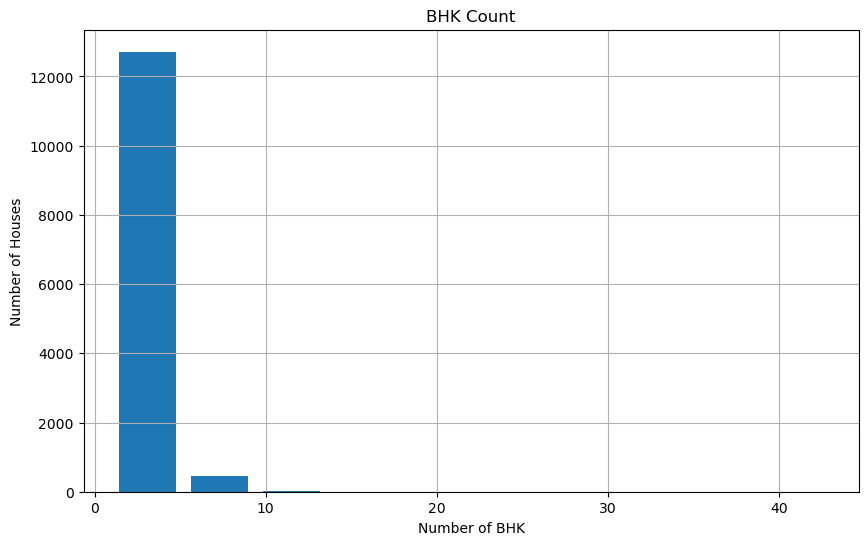

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['bhk'], rwidth=0.8)
plt.xlabel("Number of BHK")
plt.ylabel("Number of Houses")
plt.title("BHK Count")
plt.grid()
plt.show()

In [33]:
df['price_per_sqft'] = df['price']*100000 / df['total_sqft']

In [35]:
df[['location', 'total_sqft', 'price', 'price_per_sqft']].head()

,location,total_sqft,price,price_per_sqft
0,Electronic City Phase II,1056.0,39.07,3699.810606
1,Chikka Tirupathi,2600.0,120.00,4615.384615
2,Uttarahalli,1440.0,62.00,4305.555556
3,Lingadheeranahalli,1521.0,95.00,6245.890861
4,Kothanur,1200.0,51.00,4250.000000


In [37]:
df['location'] = df['location'].apply(lambda x: x.strip())  # remove spaces
location_stats = df['location'].value_counts()

location_stats_less_than_10 = location_stats[location_stats <= 10]

df['location'] = df['location'].apply(
    lambda x: 'other' if x in location_stats_less_than_10 else x
)

In [39]:
df['location'].nunique()

241

In [41]:
df[df['total_sqft']/df['bhk'] < 300].head()

,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Ready To Move,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Ready To Move,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Ready To Move,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Ready To Move,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Ready To Move,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [43]:
df = df[df['total_sqft']/df['bhk'] >= 300]

In [45]:
def remove_outliers_pps(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] >= (m - st)) & (subdf['price_per_sqft'] <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df = remove_outliers_pps(df)

In [47]:
df.columns

Index(['availability', 'location', 'size', 'total_sqft', 'bath', 'price',
       'bhk', 'price_per_sqft'],
      dtype='object')

In [49]:
df_model = df[['location', 'total_sqft', 'bath', 'bhk', 'price']]

In [51]:
dummies = pd.get_dummies(df_model['location'], drop_first=True)

In [53]:
df_model = pd.concat([df_model.drop('location', axis=1), dummies], axis=1)

In [55]:
df_model.head()

,total_sqft,bath,bhk,price,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,4,428.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,194.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,235.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,130.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,148.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
X = df_model.drop('price', axis=1)   # features
y = df_model['price']                # what we want to predict

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [61]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [63]:
model.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = model.predict(X_test)

In [67]:
results = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})
results.head(10)

,Actual Price,Predicted Price
1780,50.00,45.849823
9132,76.00,74.866390
2859,77.68,91.939869
7109,252.00,160.995324
10112,110.00,114.259568
5153,62.00,52.730027
7257,128.00,152.648648
1155,47.39,60.527307
3131,69.61,70.742510
3209,45.00,53.246619


In [69]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mean Absolute Error: 19.163049045465904
R² Score: 0.7951977329254548


In [71]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

In [73]:
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, scoring='r2', cv=5)
    return np.mean(scores)

In [75]:
lr_score = evaluate_model(LinearRegression(), X, y)
lasso_score = evaluate_model(Lasso(), X, y)
dt_score = evaluate_model(DecisionTreeRegressor(), X, y)

print("Linear Regression R² Score:", lr_score)
print("Lasso Regression R² Score:", lasso_score)
print("Decision Tree R² Score:", dt_score)

Linear Regression R² Score: -1.4953307643133473
Lasso Regression R² Score: 0.6694919535467159
Decision Tree R² Score: 0.46802440921990646


In [77]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20]
}

grid = GridSearchCV(DecisionTreeRegressor(), params, scoring='r2', cv=5)
grid.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='r2')

In [79]:
print("Best Score:", grid.best_score_)
print("Best Parameters:", grid.best_params_)

Best Score: 0.6148765427098853
Best Parameters: {'max_depth': 10, 'min_samples_split': 20}


In [81]:
best_model = grid.best_estimator_

In [83]:
import joblib

In [85]:
# Save the best model
joblib.dump(best_model, 'bangalore_home_price_model.pkl')

# Save the column names
columns = X.columns
joblib.dump(columns, 'model_columns.pkl')

['model_columns.pkl']

In [87]:
# Load model
model_loaded = joblib.load('bangalore_home_price_model.pkl')

# Load columns
columns_loaded = joblib.load('model_columns.pkl')

In [89]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(columns_loaded == location)[0][0] if location in columns_loaded else -1

    x = np.zeros(len(columns_loaded))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model_loaded.predict([x])[0]

In [91]:
predict_price('Indira Nagar', 1000, 2, 2)

C:\Users\spars\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


47.13432213209736

In [93]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [99]:
import streamlit as st
import joblib
import numpy as np

model = joblib.load('bangalore_home_price_model.pkl')
columns = joblib.load('model_columns.pkl')

st.title("🏠 Bangalore House Price Predictor")

location = st.text_input("Location (e.g., Whitefield)")
sqft = st.number_input("Total Square Feet", value=1000)
bath = st.number_input("Bathrooms", value=2)
bhk = st.number_input("Bedrooms (BHK)", value=2)

if st.button("Predict Price"):
    try:
        loc_index = np.where(columns == location)[0][0] if location in columns else -1
        x = np.zeros(len(columns))
        x[0] = sqft
        x[1] = bath
        x[2] = bhk
        if loc_index >= 0:
            x[loc_index] = 1
        price = model.predict([x])[0]
        st.success(f"Predicted Price: ₹{round(price, 2)} lakhs")
    except Exception as e:
        st.error("Error in prediction: " + str(e))